In [1]:
import pandas as pd

sample_submission = pd.read_csv("lab4_data\\sample_submission.csv")
train_BRCpofr = pd.read_csv("lab4_data\\train_BRCpofr.csv")
test_koRSKBP = pd.read_csv("lab4_data\\test_koRSKBP.csv")

In [2]:
sample_submission.head(3)

,id,cltv
0,89393,97952.828978
1,89394,97952.828978
2,89395,97952.828978


In [3]:
train_BRCpofr.head(3)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212


In [4]:
test_koRSKBP.head(3)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold


In [5]:
data=pd.concat([train_BRCpofr,test_koRSKBP.merge(sample_submission, on = 'id')])

In [6]:
data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.000000
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.000000
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.000000
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.000000
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver,97952.828978
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold,97952.828978
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum,97952.828978
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver,97952.828978


In [7]:
data.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [8]:
data_dumm = pd.get_dummies(data,dtype='int8')

In [9]:
data_dumm

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308.000000,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400.000000,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212.000000,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920.000000,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736.000000,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,1,6,0,97952.828978,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
59591,148984,0,6,0,97952.828978,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
59592,148985,1,4,3323,97952.828978,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
59593,148986,0,1,2886,97952.828978,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1


In [24]:
from numpy import mean
from numpy import std

def clean(df):
    # calculate summary statistics
    data_mean, data_std = mean(df['cltv']), std(df['cltv'])
    # identify outliers
    cut_off = data_std * 1
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df['cltv'] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = df[(df['cltv'] >= lower)&(df['cltv'] <= upper)]
    return outliers_removed

In [25]:
data_dumm_clean = clean(data_dumm)

Identified outliers: 11300


In [27]:
X = data_dumm_clean.drop('cltv',axis=1)
y = data_dumm_clean['cltv']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

model_lr = LinearRegression().fit(X_train,y_train)
model_rf = RandomForestRegressor().fit(X_train,y_train)
model_mlp = MLPRegressor().fit(X_train,y_train)

models = [model_lr,model_rf,model_mlp]

r2 = []
rmse=[]
mare=[]

for model in models:
    y_pred = model.predict(X_test)
    
    r2.append(r2_score(y_test, y_pred))
    rmse.append(root_mean_squared_error(y_test, y_pred))
    mare.append(mean_absolute_percentage_error(y_test, y_pred))

df_res = pd.DataFrame()
df_res['model'] = models
df_res['r2 score'] = r2
df_res['rmse'] = rmse
df_res['mare'] = mare

In [33]:
df_res

,model,r2 score,rmse,mare
0,LinearRegression(),0.352348,21351.122959,0.244957
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.489236,18960.954360,0.176798
2,MLPRegressor(),0.368228,21087.735421,0.256780


In [34]:
rf_pred = model_rf.predict(X_test)

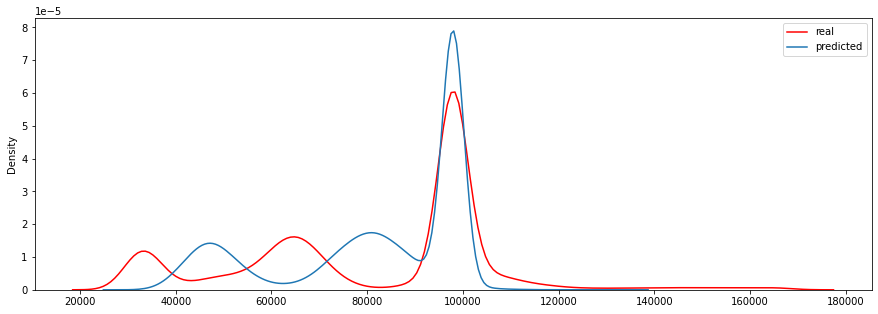

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 5]

sns.kdeplot(x=y_test.values, color = 'red', label='real')
sns.kdeplot(x=rf_pred, label = 'predicted')
plt.legend()